# **SOURCES**

Dataset:
https://www.oecd-ilibrary.org/environment/data/oecd-environment-statistics/threatened-species_data-00605-en

Barplot:
https://python-graph-gallery.com/11-grouped-barplot/

# **EXPLORATION / NETTOYAGE DES DONNEES**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [2]:
from google.colab import files
data_to_load = files.upload()

Saving WILD_LIFE_22102020174026486.csv to WILD_LIFE_22102020174026486.csv


In [3]:
import io
df = pd.read_csv(io.BytesIO(data_to_load['WILD_LIFE_22102020174026486.csv']))
df.head()

,IUCN,IUCN Category,SPEC,Species,COU,Country,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,TOT_KNOWN,Total number of known species,MAMMAL,Mammals,AUS,Australia,NBR,Number,0,Units,NaN,NaN,374.0,NaN,NaN
1,TOT_KNOWN_IND,Total number of indigenous known species,MAMMAL,Mammals,AUS,Australia,NBR,Number,0,Units,NaN,NaN,348.0,NaN,NaN
2,ENDANGERED,Number of endangered species,MAMMAL,Mammals,AUS,Australia,NBR,Number,0,Units,NaN,NaN,37.0,NaN,NaN
3,CRITICAL,Number of critically endangered species,MAMMAL,Mammals,AUS,Australia,NBR,Number,0,Units,NaN,NaN,10.0,NaN,NaN
4,VULNERABLE,Number of vulnerable species,MAMMAL,Mammals,AUS,Australia,NBR,Number,0,Units,NaN,NaN,60.0,NaN,NaN


In [4]:
df.shape

(3317, 15)

In [5]:
df = df.drop(labels = ['SPEC','COU','PowerCode Code','PowerCode','Reference Period Code','Reference Period', 'Flag Codes','Flags'], axis = 1)


In [6]:
df = df.drop(labels = ['Unit Code'], axis = 1)
df.head()

,IUCN,IUCN Category,Species,Country,Unit,Value
0,TOT_KNOWN,Total number of known species,Mammals,Australia,Number,374.0
1,TOT_KNOWN_IND,Total number of indigenous known species,Mammals,Australia,Number,348.0
2,ENDANGERED,Number of endangered species,Mammals,Australia,Number,37.0
3,CRITICAL,Number of critically endangered species,Mammals,Australia,Number,10.0
4,VULNERABLE,Number of vulnerable species,Mammals,Australia,Number,60.0


In [7]:
df.dtypes

IUCN              object
IUCN Category     object
Species           object
Country           object
Unit              object
Value            float64
dtype: object

In [8]:
df = df.rename(columns = {'IUCN Category': 'IUCN_Category'})
df.head()	

,IUCN,IUCN_Category,Species,Country,Unit,Value
0,TOT_KNOWN,Total number of known species,Mammals,Australia,Number,374.0
1,TOT_KNOWN_IND,Total number of indigenous known species,Mammals,Australia,Number,348.0
2,ENDANGERED,Number of endangered species,Mammals,Australia,Number,37.0
3,CRITICAL,Number of critically endangered species,Mammals,Australia,Number,10.0
4,VULNERABLE,Number of vulnerable species,Mammals,Australia,Number,60.0


In [9]:
 IUCN_category_arr = df.IUCN_Category.unique()

In [10]:
IUCN_code_arr = df.IUCN.unique()

In [11]:
IUCN_code_df = pd.DataFrame({'IUCN_CODE': IUCN_code_arr, 'IUCN_category':IUCN_category_arr})
IUCN_code_df

,IUCN_CODE,IUCN_category
0,TOT_KNOWN,Total number of known species
1,TOT_KNOWN_IND,Total number of indigenous known species
2,ENDANGERED,Number of endangered species
3,CRITICAL,Number of critically endangered species
4,VULNERABLE,Number of vulnerable species
5,THREATENED,Total number of threatened species
6,ENDANGERED_IND,Number of endangered indigenous species
7,CRITICAL_IND,Number of critically endangered indigenous spe...
8,VULNERABLE_IND,Number of vulnerable indigenous species
9,THREAT_PERCENT,Threatened species as % of known species


In [12]:
df.Species.unique()

array(['Mammals', 'Birds', 'Reptiles', 'Amphibians', 'Vascular plants',
       'Fish', 'Marine Fish', 'Freshwater Fish', 'Mosses', 'Lichens',
       'Invertebrates'], dtype=object)

In [13]:
df.Country.unique()

array(['Australia', 'Austria', 'Belgium', 'Canada', 'Czech Republic',
       'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Hungary',
       'Iceland', 'Ireland', 'Italy', 'Japan', 'Korea', 'Mexico',
       'Netherlands', 'New Zealand', 'Norway', 'Poland', 'Portugal',
       'Slovak Republic', 'Spain', 'Sweden', 'Switzerland', 'Turkey',
       'United Kingdom', 'Chile', 'Estonia', 'Israel', 'Russia',
       'Slovenia', 'Luxembourg', 'Colombia', 'Latvia', 'Brazil',
       'Costa Rica', 'Lithuania'], dtype=object)

In [14]:
df.describe(include = 'all')

,IUCN,IUCN_Category,Species,Country,Unit,Value
count,3317,3317,3317,3317,3317,3317.000000
unique,12,12,11,39,2,NaN
top,TOT_KNOWN,Total number of known species,Birds,Canada,Number,NaN
freq,341,341,381,132,2777,NaN
mean,NaN,NaN,NaN,NaN,NaN,479.412124
std,NaN,NaN,NaN,NaN,NaN,3429.800340
min,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,7.000000
50%,NaN,NaN,NaN,NaN,NaN,24.000000
75%,NaN,NaN,NaN,NaN,NaN,92.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3317 entries, 0 to 3316
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   IUCN           3317 non-null   object 
 1   IUCN_Category  3317 non-null   object 
 2   Species        3317 non-null   object 
 3   Country        3317 non-null   object 
 4   Unit           3317 non-null   object 
 5   Value          3317 non-null   float64
dtypes: float64(1), object(5)
memory usage: 155.6+ KB


In [16]:
df.loc[(df['IUCN'] == 'THREAT_PERCENT') & (df['Country'] == 'France'), :]

,IUCN,IUCN_Category,Species,Country,Unit,Value
1331,THREAT_PERCENT,Threatened species as % of known species,Mammals,France,Percentage,13.600
1332,THREAT_PERCENT,Threatened species as % of known species,Birds,France,Percentage,27.366
1333,THREAT_PERCENT,Threatened species as % of known species,Reptiles,France,Percentage,23.684
1334,THREAT_PERCENT,Threatened species as % of known species,Amphibians,France,Percentage,22.857
1335,THREAT_PERCENT,Threatened species as % of known species,Freshwater Fish,France,Percentage,18.750
3125,THREAT_PERCENT,Threatened species as % of known species,Vascular plants,France,Percentage,8.450
3126,THREAT_PERCENT,Threatened species as % of known species,Fish,France,Percentage,15.951
3127,THREAT_PERCENT,Threatened species as % of known species,Invertebrates,France,Percentage,20.660


# **VISUALISATIONS MATPLOTLIB**

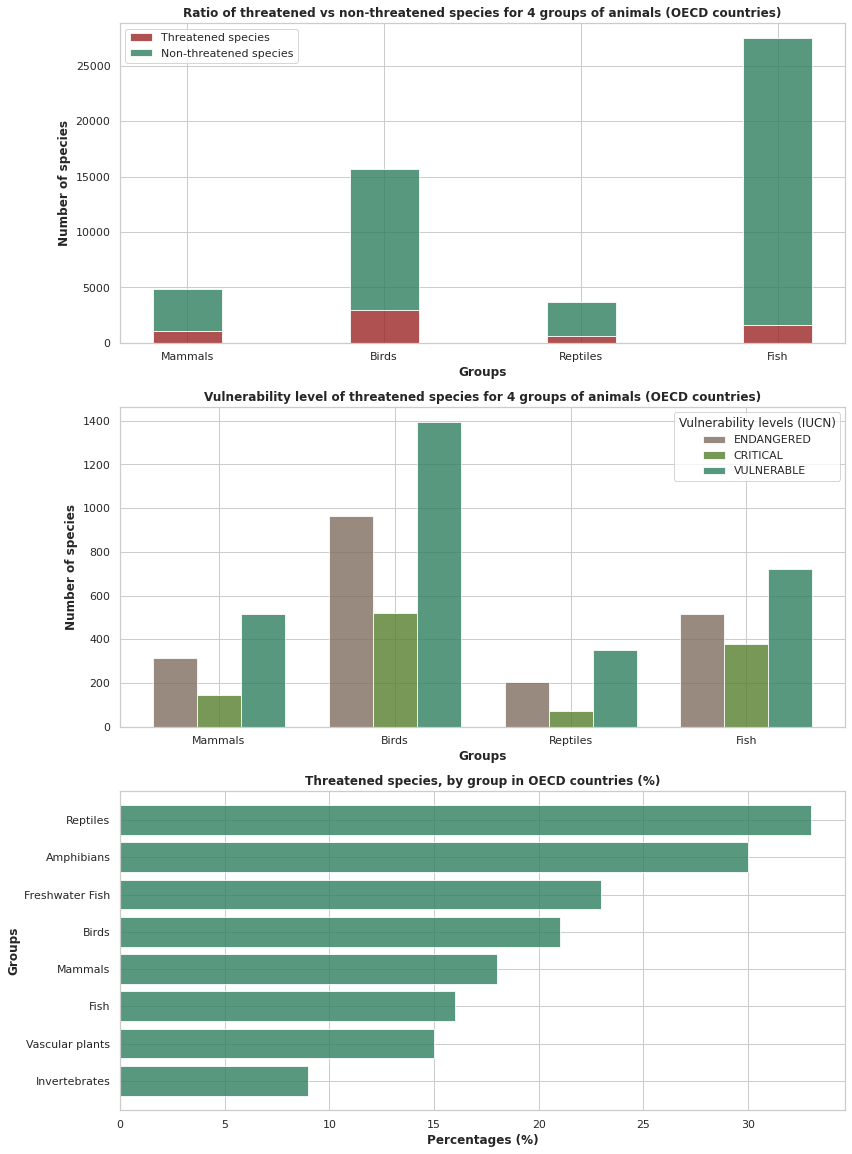

In [39]:
fig, ax = plt.subplots(figsize = (13,20))
sns.set_theme(style="whitegrid")

#figue 1 representant le nombre d'especes total vs le nombre d'especes menacees pour  groupes : Mammals, Birds, Reptiles et Fish
ax3 = plt.subplot(311)

# Values of each group
bars1 = [int((df.loc[(df['IUCN'] == 'THREATENED') & (df['Species'] == 'Mammals'), ['Value']]).sum()), int((df.loc[(df['IUCN'] == 'THREATENED') & (df['Species'] == 'Birds'), ['Value']]).sum()), 
         int((df.loc[(df['IUCN'] == 'THREATENED') & (df['Species'] == 'Reptiles'), ['Value']]).sum()),int((df.loc[(df['IUCN'] == 'THREATENED') & (df['Species'] == 'Fish'), ['Value']]).sum())]

bars2 = [int((df.loc[(df['IUCN'] == 'TOT_KNOWN') & (df['Species'] == 'Mammals'), ['Value']]).sum() - (df.loc[(df['IUCN'] == 'THREATENED') & (df['Species'] == 'Mammals'), ['Value']]).sum()),
         int((df.loc[(df['IUCN'] == 'TOT_KNOWN') & (df['Species'] == 'Birds'), ['Value']]).sum() - (df.loc[(df['IUCN'] == 'THREATENED') & (df['Species'] == 'Birds'), ['Value']]).sum()),
         int((df.loc[(df['IUCN'] == 'TOT_KNOWN') & (df['Species'] == 'Reptiles'), ['Value']]).sum() - (df.loc[(df['IUCN'] == 'THREATENED') & (df['Species'] == 'Reptiles'), ['Value']]).sum()),
         int((df.loc[(df['IUCN'] == 'TOT_KNOWN') & (df['Species'] == 'Fish'), ['Value']]).sum() - (df.loc[(df['IUCN'] == 'THREATENED') & (df['Species'] == 'Fish'), ['Value']]).sum())]
 
# Heights of bars1 + bars2
bars = np.add(bars1, bars2).tolist()
 
# The position of the bars on the x-axis
r = [0,1,2,3]
 
# Names of group and bar width
names = ['Mammals', 'Birds', 'Reptiles', 'Fish']
barWidth = 0.35
 
# Create brown bars
plt.bar(r, bars1, color='#9c2525', edgecolor='white', width=barWidth, label = "Threatened species", alpha = 0.80)
# Create green bars (middle), on top of the firs ones
plt.bar(r, bars2, bottom=bars1, color='#2d7f5e', edgecolor='white', width=barWidth,  label = "Non-threatened species",alpha = 0.80)

 
# Custom X axis
plt.xticks(r, names)
plt.xlabel("Groups", fontweight='bold')
plt.ylabel("Number of species", fontweight='bold')
plt.legend()
plt.title("Ratio of threatened vs non-threatened species for 4 groups of animals (OECD countries)", fontweight='bold')



#figure 2 (complementaire a la figure 1) representant le nombre d'especes menacees pour 4 groupes : Mammals, Birds, Reptiles et Fish
ax1 = plt.subplot(312)

barWidth = 0.25

#listes pour chaque niveau de vulnerabilite (endangered, critical, vulnerable)

bars1 = [int((df.loc[(df['IUCN'] == 'ENDANGERED') & (df['Species'] == 'Mammals'), ['Value']]).sum()), int((df.loc[(df['IUCN'] == 'ENDANGERED') & (df['Species'] == 'Birds'), ['Value']]).sum()), 
         int((df.loc[(df['IUCN'] == 'ENDANGERED') & (df['Species'] == 'Reptiles'), ['Value']]).sum()),int((df.loc[(df['IUCN'] == 'ENDANGERED') & (df['Species'] == 'Fish'), ['Value']]).sum())]

bars2 = [int((df.loc[(df['IUCN'] == 'CRITICAL') & (df['Species'] == 'Mammals'), ['Value']]).sum()), int((df.loc[(df['IUCN'] == 'CRITICAL') & (df['Species'] == 'Birds'), ['Value']]).sum()),
         int((df.loc[(df['IUCN'] == 'CRITICAL') & (df['Species'] == 'Reptiles'), ['Value']]).sum()),int((df.loc[(df['IUCN'] == 'CRITICAL') & (df['Species'] == 'Fish'), ['Value']]).sum())]

bars3 = [int((df.loc[(df['IUCN'] == 'VULNERABLE') & (df['Species'] == 'Mammals'), ['Value']]).sum()), int((df.loc[(df['IUCN'] == 'VULNERABLE') & (df['Species'] == 'Birds'), ['Value']]).sum()),
         int((df.loc[(df['IUCN'] == 'VULNERABLE') & (df['Species'] == 'Reptiles'), ['Value']]).sum()),int((df.loc[(df['IUCN'] == 'VULNERABLE') & (df['Species'] == 'Fish'), ['Value']]).sum())]

#bars4 = [int((df.loc[(df['IUCN'] == 'TOT_KNOWN') & (df['Species'] == 'Mammals'), ['Value']]).sum() - (df.loc[(df['IUCN'] == 'THREATENED') & (df['Species'] == 'Mammals'), ['Value']]).sum()),
         #int((df.loc[(df['IUCN'] == 'TOT_KNOWN') & (df['Species'] == 'Birds'), ['Value']]).sum() - (df.loc[(df['IUCN'] == 'THREATENED') & (df['Species'] == 'Birds'), ['Value']]).sum()),
         #int((df.loc[(df['IUCN'] == 'TOT_KNOWN') & (df['Species'] == 'Reptiles'), ['Value']]).sum() - (df.loc[(df['IUCN'] == 'THREATENED') & (df['Species'] == 'Reptiles'), ['Value']]).sum()),
         #int((df.loc[(df['IUCN'] == 'TOT_KNOWN') & (df['Species'] == 'Fish'), ['Value']]).sum() - (df.loc[(df['IUCN'] == 'THREATENED') & (df['Species'] == 'Fish'), ['Value']]).sum())]


#figure
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
#r4 = [x + barWidth for x in r3]

ax1.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='ENDANGERED',alpha = 0.80)
ax1.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='CRITICAL',alpha = 0.80)
ax1.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white', label='VULNERABLE',alpha = 0.80)
#plt.bar(r4, bars4, color='#2d7f5e', width=barWidth, edgecolor='white', label='NON-THREATENED')

#legendes, titres
plt.xlabel('Groups', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['Mammals', 'Birds', 'Reptiles', 'Fish'])
plt.ylabel("Number of species", fontweight='bold')
plt.legend(title = 'Vulnerability levels (IUCN)')
plt.title("Vulnerability level of threatened species for 4 groups of animals (OECD countries)", fontweight='bold')



#figure 3 representant le nombre d'especes menacees pour 4 groupes : Mammals, Birds, Reptiles et Fish
ax2 = plt.subplot(313)

height = [int((df.loc[(df['IUCN'] == 'THREAT_PERCENT') & (df['Species'] == 'Mammals'), ['Value']]).mean()), 
          int((df.loc[(df['IUCN'] == 'THREAT_PERCENT') & (df['Species'] == 'Birds'), ['Value']]).mean()),
          int((df.loc[(df['IUCN'] == 'THREAT_PERCENT') & (df['Species'] == 'Reptiles'), ['Value']]).mean()),
          int((df.loc[(df['IUCN'] == 'THREAT_PERCENT') & (df['Species'] == 'Amphibians'), ['Value']]).mean()),
          int((df.loc[(df['IUCN'] == 'THREAT_PERCENT') & (df['Species'] == 'Vascular plants'), ['Value']]).mean()),
          int((df.loc[(df['IUCN'] == 'THREAT_PERCENT') & (df['Species'] == 'Fish'), ['Value']]).mean()),
          int((df.loc[(df['IUCN'] == 'THREAT_PERCENT') & (df['Species'] == 'Freshwater Fish'), ['Value']]).mean()),
          int((df.loc[(df['IUCN'] == 'THREAT_PERCENT') & (df['Species'] == 'Invertebrates'), ['Value']]).mean())]


bars = ('Mammals', 'Birds', 'Reptiles', 'Amphibians', 'Vascular plants', 'Fish', 'Freshwater Fish', 'Invertebrates')

#tri de la liste height afin d'afficher les valeurs de la plus grande a la plus petite
unsorted_list = [(height, bars) for bars, height in zip(bars, height)]
sorted_list = sorted(unsorted_list)

bars_sorted = []
height_sorted = []

for i in sorted_list:
    bars_sorted += [i[1]]
    height_sorted += [i[0]]

# figure
ax2.barh(range(len(height_sorted)),height_sorted, color = '#2d7f5e',alpha = 0.80)

# legendes, titres
plt.xlabel('Percentages (%)', fontweight='bold')
plt.yticks(range(len(height_sorted)), bars_sorted)
plt.ylabel("Groups", fontweight='bold')
plt.title("Threatened species, by group in OECD countries (%)", fontweight='bold')


plt.show()

In [40]:
fig1 = ax1.get_figure()

fig1.savefig('threatened_species.jpg')

# **VISUALISATIONS SEABORN / PLOTLY**

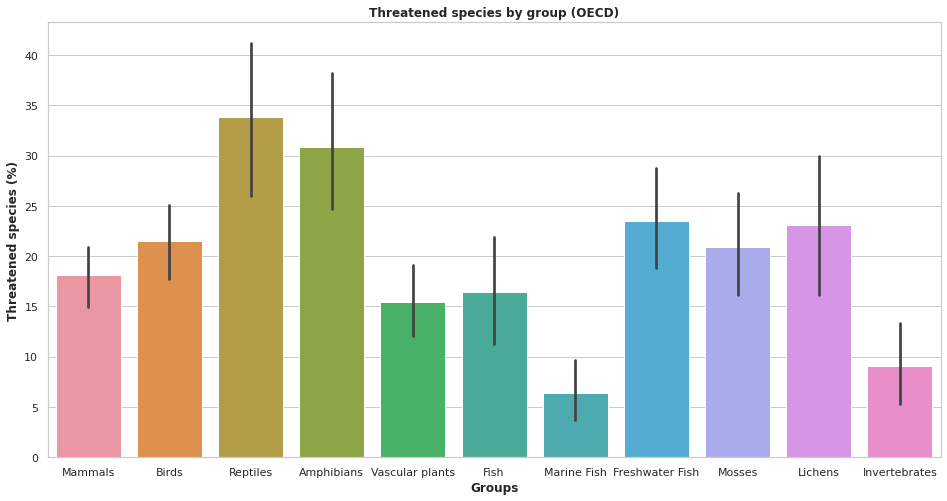

In [35]:
#Threatened species by group (OECD)

fig, ax = plt.subplots(figsize = (16,8))

df[df['IUCN'] == 'THREATENED']['Value']

sns.barplot(x = 'Species', 
            y = df[df['IUCN'] == 'THREAT_PERCENT']['Value'], 
            data = df
            )

plt.xlabel('Groups', fontweight='bold')
plt.ylabel("Threatened species (%)", fontweight='bold')
plt.title("Threatened species by group (OECD)", fontweight='bold')

plt.show()

In [49]:
#Threatened species by group and by country (OECD)


px.scatter(data_frame = df, 
                 x= df[df['IUCN'] == 'THREAT_PERCENT']['Species'], 
                 y=df[df['IUCN'] == 'THREAT_PERCENT']['Value'],
           size = df[df['IUCN'] == 'THREAT_PERCENT']['Value'],
           title="Threatened species by group and by country (OECD)",
                 labels={
                     'x': "Groups",
                     'y': "Threatened species (%)",
                     'animation_frame':'Country',
                     'color':'Intensity of the threat'},
           animation_frame = df[df['IUCN'] == 'THREAT_PERCENT']['Country'],           
            range_y = [0,100],color =df[df['IUCN'] == 'THREAT_PERCENT']['Value'], color_continuous_scale=px.colors.sequential.Reds)

